# WHY FAKE NEWS IS A PROBLEM?
**Fake news refers to misinformation, disinformation or mal-information which is spread through word of mouth and traditional media and more recently through digital forms of communication such as edited videos, memes, unverified advertisements and social media propagated rumours.Fake news spread through social media has become a serious problem, with the potential of it resulting in mob violence, suicides etc as a result of misinformation circulated on social media.**

# BRIEF DESCRIPTION OF DATASET
**This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.**

import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./True.csv
./Fake.csv
./.config/config_sentinel
./.config/.last_update_check.json
./.config/.last_opt_in_prompt.yaml
./.config/.last_survey_prompt.yaml
./.config/active_config
./.config/gce
./.config/logs/2023.04.13/13.28.53.665788.log
./.config/logs/2023.04.13/13.30.17.294219.log
./.config/logs/2023.04.13/13.29.19.483680.log
./.config/logs/2023.04.13/13.29.51.584180.log
./.config/logs/2023.04.13/13.30.16.508499.log
./.config/logs/2023.04.13/13.29.43.381288.log
./.config/configurations/config_default
./sample_data/README.md
./sample_data/anscombe.json
./sample_data/mnist_train_small.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv


# LOADING THE NECESSARY LIBRARIES

import several libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

# IMPORTING THE DATASET

read data from csv file

In [3]:
true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

# DATA VISUALIZATION AND PREPROCESSING

print the first 5 rows of true data frame

In [4]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

print the first 5 rows of false data frame

In [5]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

create new column 'category'

In [6]:
true['category'] = 1
false['category'] = 0

concat 2 data frames

In [7]:
df = pd.concat([true,false]) #Merging the 2 datasets

**SO, WE CAN SEE THAT THE DATASET IS BALANCED**

print the first 5 rows

In [8]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

This code checks for the number of NaN values in each column of a DataFrame df. The isna() function returns a DataFrame with the same shape as the original df, but with True values for elements that are NaN and False otherwise. Then, sum() is called on the resulting DataFrame to count the number of True values in each column, which gives the number of NaN values in each column of df.





In [9]:
df.isna().sum() # Checking for nan Values

title       0
text        0
subject     0
date        0
category    0
dtype: int64

This code is counting the number of non-null values in the 'title' column of a dataframe named 'df'.





In [10]:
df.title.count()

44898

This code is counting the frequency of unique values in the 'subject' column of a DataFrame named 'df'. The 'value_counts()' method is applied on the 'subject' column of the DataFrame 'df' to count the frequency of each unique value present in the column.





In [11]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

**MERGING ALL THE TEXT DATA INTO 1 COLUMN i.e. 'text'**

This code creates a count plot using Seaborn library to visualize the distribution of the "subject" column in a pandas DataFrame "df". The count plot is based on the "category" column which is represented by different colors on the same plot. The x-axis shows the categories of the "subject" column, and the y-axis shows the count of the categories. The figure size is set to 12x8, and the font scale is increased by 20%. The x-axis labels are rotated by 90 degrees to make them readable.





[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

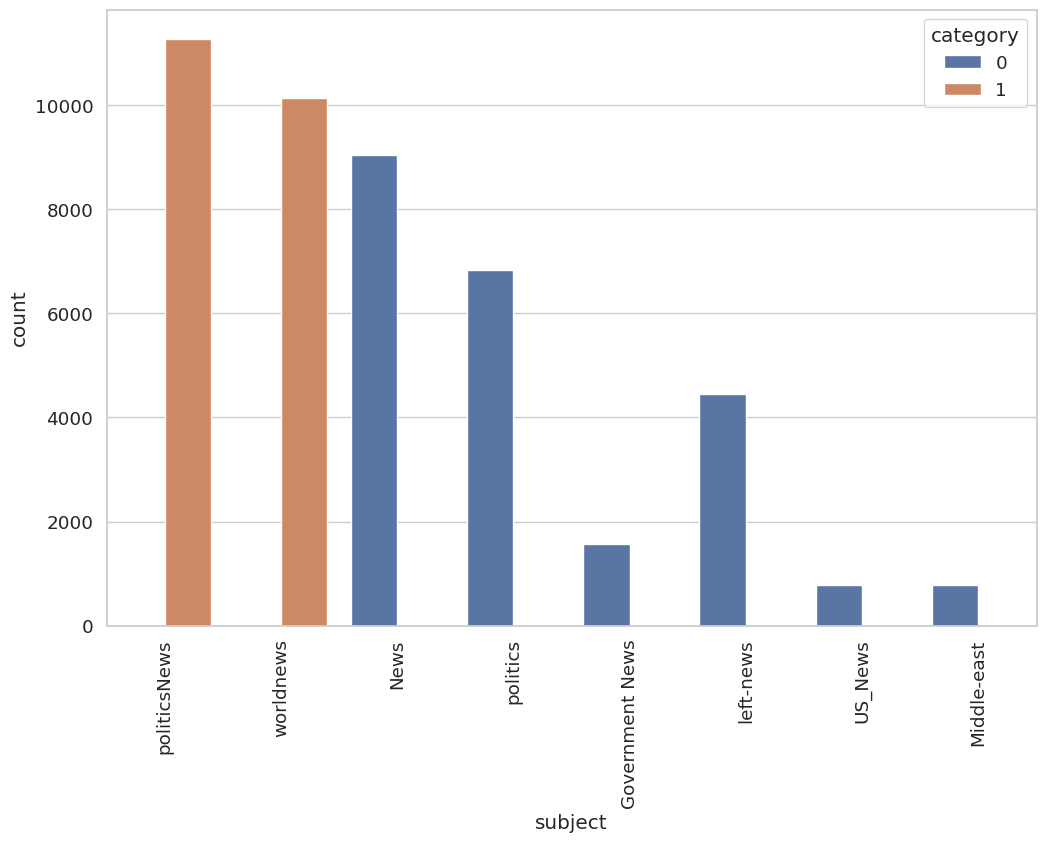

In [12]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

**SINCE THE TOPICS IN SUBJECT COLUMN ARE DIFFERENT FOR BOTH CATEGORIES, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN**

This code adds the title column to the text column in the df DataFrame, and then deletes the title, subject, and date columns from the DataFrame.





In [13]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

**WHAT ARE STOPWORDS?**

**Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.**

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

This code defines a set of stopwords in English and a list of punctuation marks, and then adds the punctuation list to the stopwords set, resulting in a larger set of words to be filtered out from text data.





In [15]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**DATA CLEANING**

The code defines several text pre-processing functions, such as removing HTML tags, removing text between square brackets, removing URLs, and removing stopwords. It then applies these functions to the 'text' column in a pandas dataframe named 'df'. The final output of the 'text' column is a cleaned version of the original text data.





In [16]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

<ipython-input-16-4f1d5a4b9299>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


**WORDCLOUD FOR REAL TEXT (LABEL - 1)**

This code generates a word cloud visualization for the text data in the dataframe df where the category is 1 (indicating real news). The WordCloud object is created with a maximum of 2000 words, a width of 1600 and height of 800, and the stopwords are set to STOPWORDS. The word cloud is then plotted using plt.imshow().





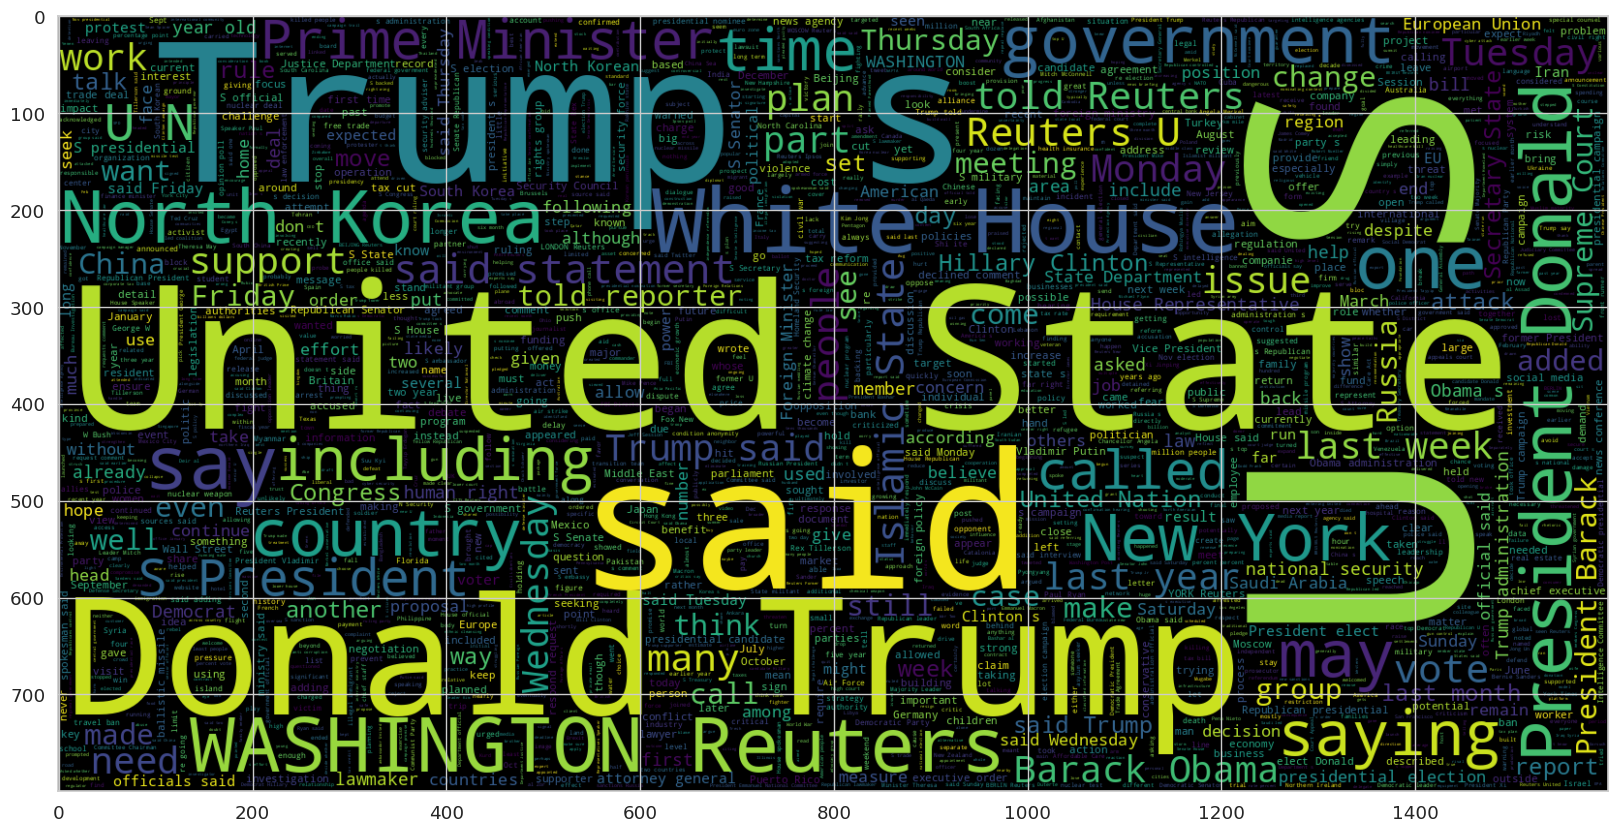

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR FAKE TEXT (LABEL - 0)**

This code generates word clouds for the text in the df dataframe based on the category column, which indicates whether the news is real or fake. The first plot shows the word cloud for the real news (category 1), while the second plot shows the word cloud for the fake news (category 0). The WordCloud module from the wordcloud library is used to generate the word clouds, and the STOPWORDS variable is used to remove common stop words from the text.





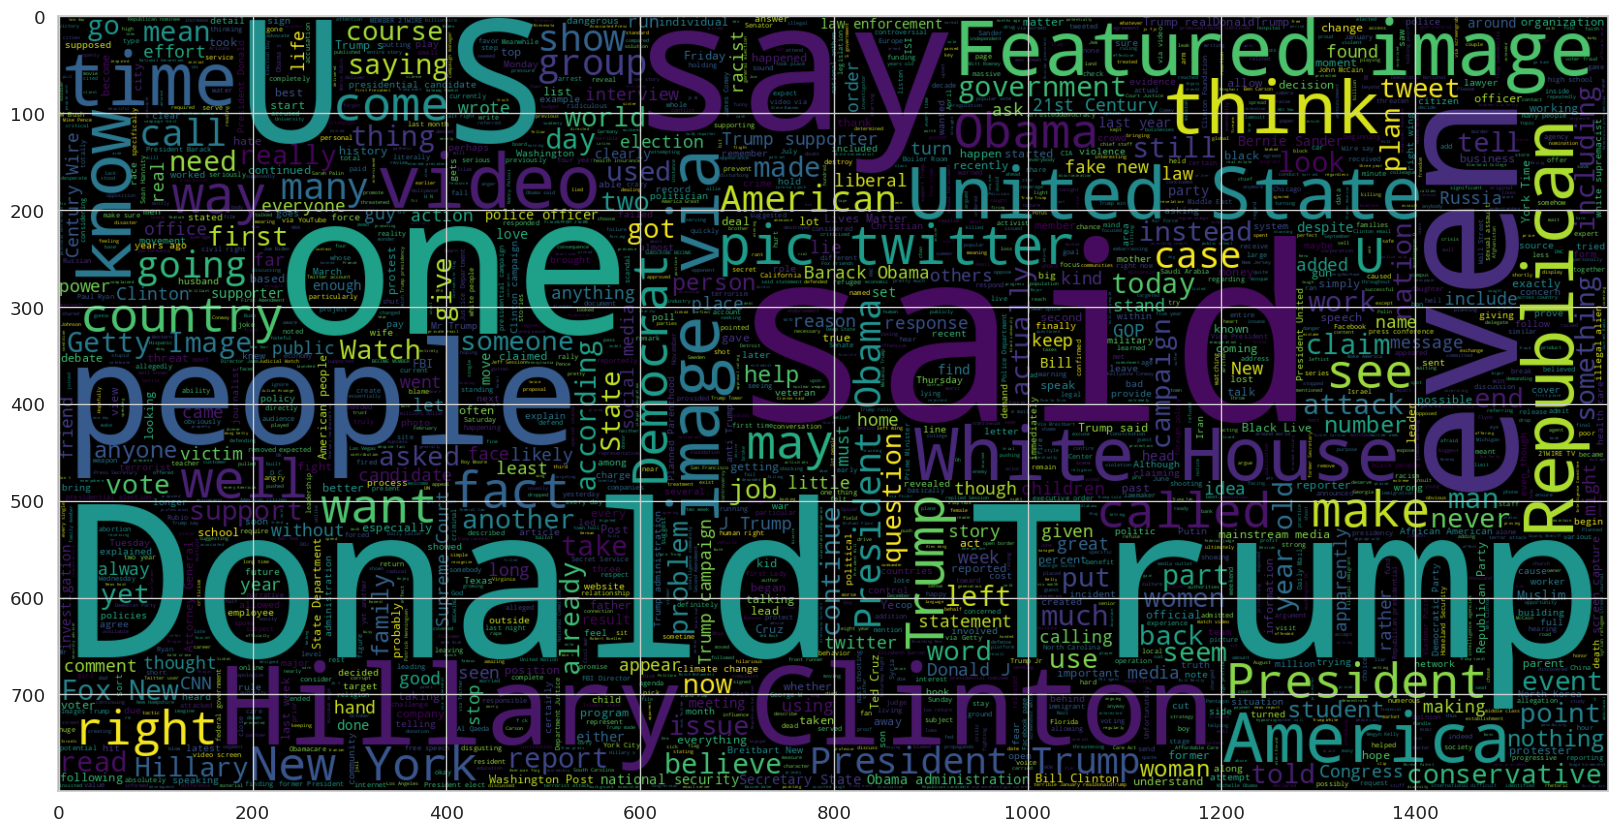

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

**Number of characters in texts**

This code generates a histogram of the length of text for both original (category 1) and fake (category 0) news articles. The length of text is calculated as the number of characters in the text. The code creates two subplots side by side and sets the figure size to (12,8). The first subplot shows a histogram of text lengths for original news articles colored in red, while the second subplot shows a histogram of text lengths for fake news articles colored in green. The figure is given a title "Characters in texts" and is displayed using the plt.show() function.





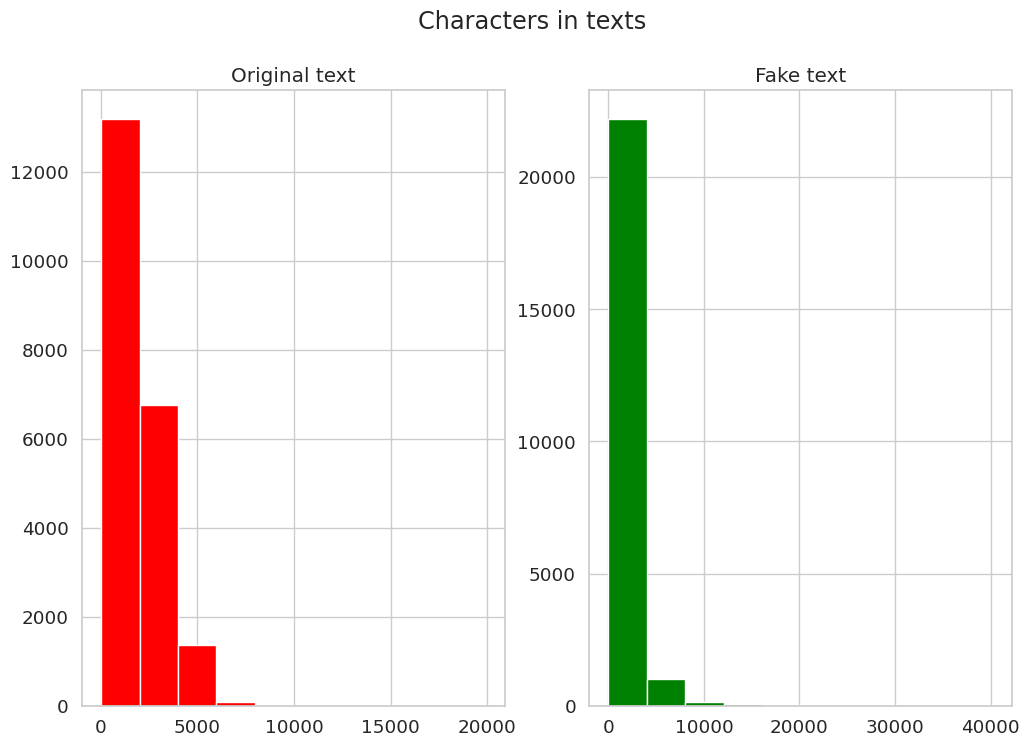

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

**The distribution of both seems to be a bit different. 2500 characters in text is the most common in original text category while around 5000 characters in text are most common in fake text category.**

**Number of words in each text**

This code creates two subplots that display histograms of the number of words in the text of articles labeled as 'Original' and 'Fake' in a dataset. The histograms are created by splitting the text into words and counting the number of words in each article. The 'Original text' histogram is shown in red, and the 'Fake text' histogram is shown in green. The figure is given the title 'Words in texts'.





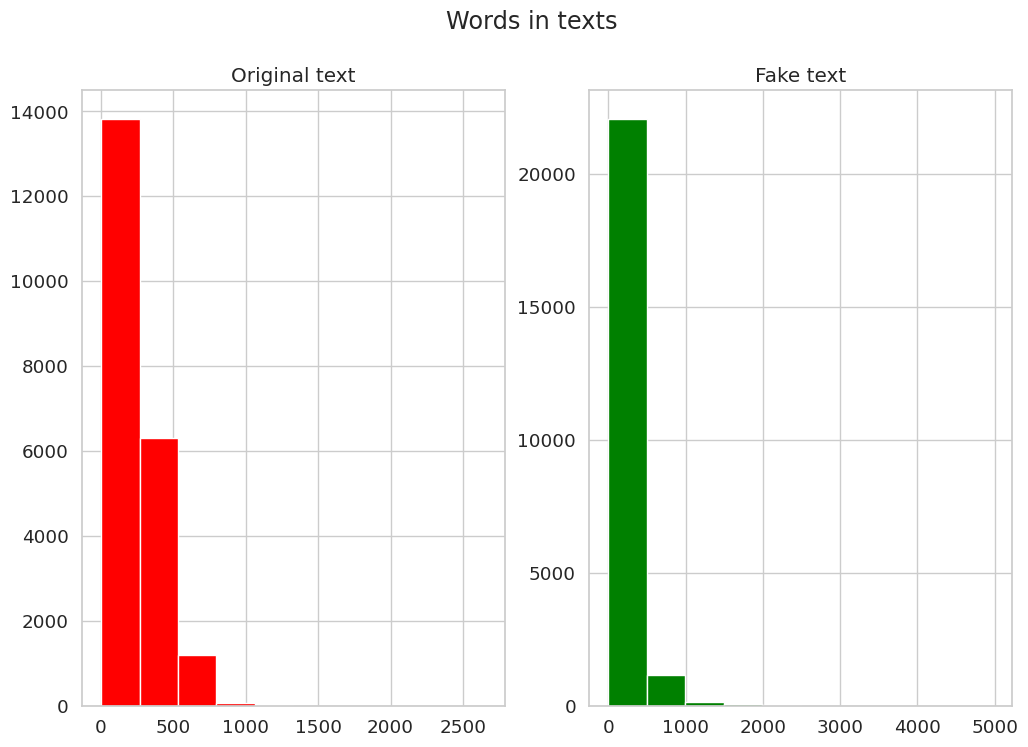

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

**Average word length in a text**

This code generates two subplots showing the distribution of the average word length for original and fake text in a dataset. The text is first split into words, then the length of each word is calculated, and finally, the average word length for each text is computed. The resulting distribution is visualized using a seaborn density plot in each subplot. The figure size is set to 20x10, and each subplot has a title indicating whether it represents original or fake text.





<ipython-input-23-cbef104b9346>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-23-cbef104b9346>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

Text(0.5, 0.98, 'Average word length in each text')

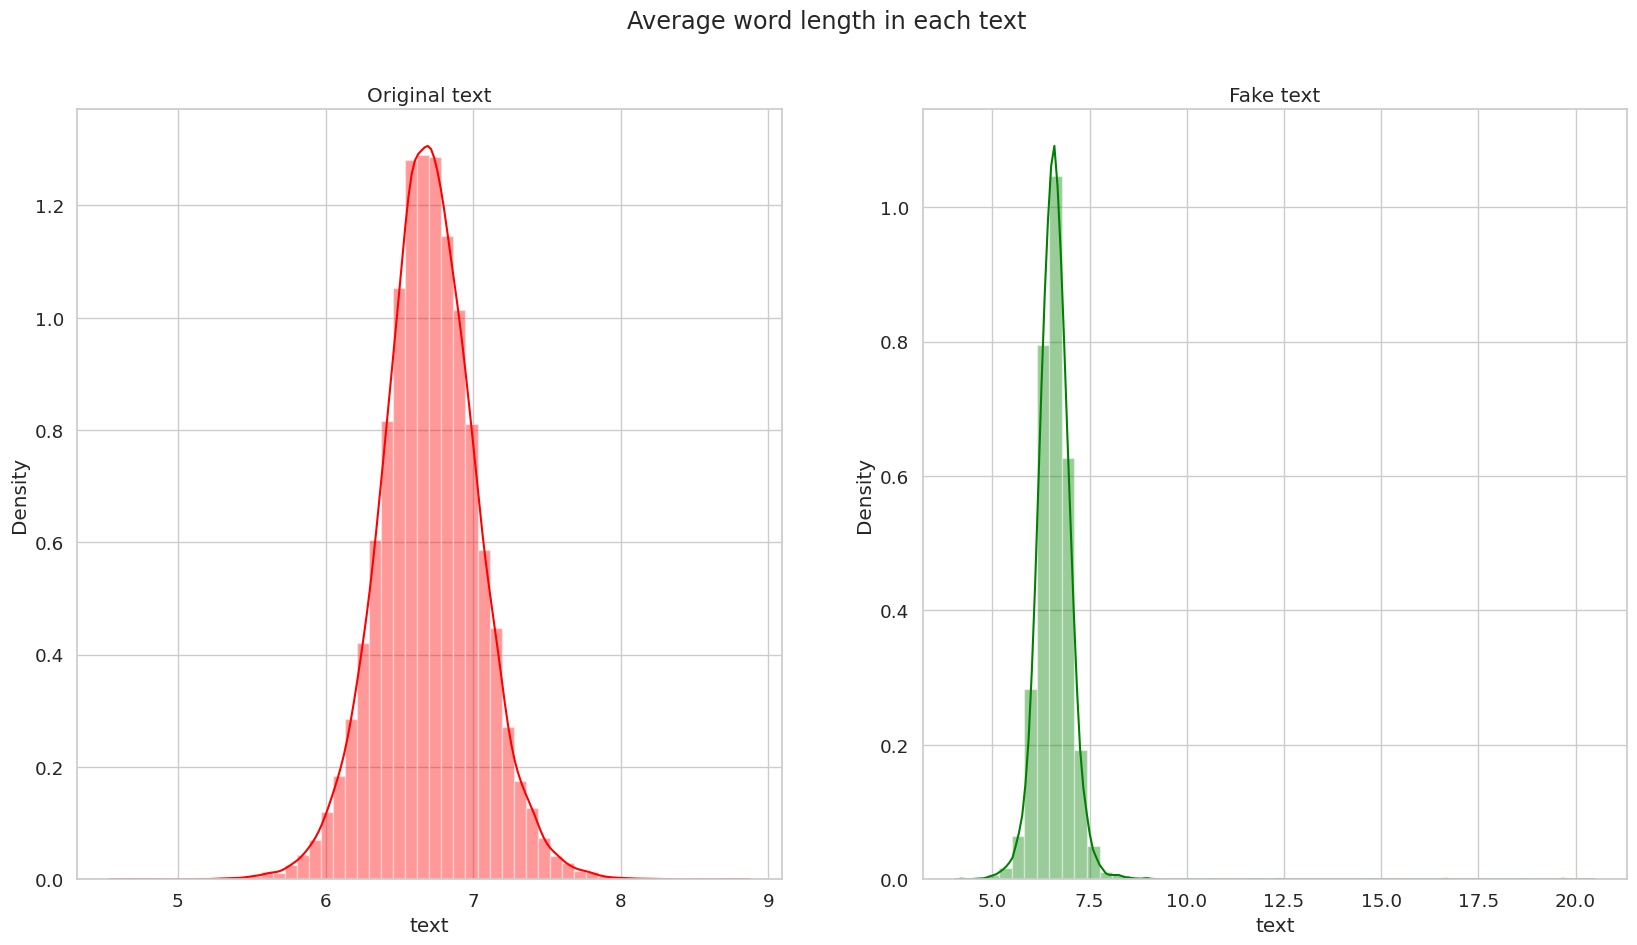

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

This code defines a function named get_corpus that takes a text as input, splits it into words and stores them in a list named words. The function then returns the list of words. The function is then called on the df.text column to create a corpus of words, which is stored in a list named corpus. The first five words in the corpus are printed using slicing.





In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

This code calculates the 10 most common words in a corpus of text. It first uses the Counter module from collections to count the frequency of each word in the corpus. Then, it selects the top 10 most common words and converts them to a dictionary.





In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

This code defines a function get_top_text_ngrams() that takes in a corpus of text data, a value for n (the number of top n-grams to return), and a value for g (the size of the n-grams to generate). It uses the CountVectorizer function from sklearn.feature_extraction.text to generate a bag-of-words representation of the corpus, and then calculates the frequency of each n-gram in the corpus. The function returns the top n n-grams based on their frequency.





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

This code generates a bar plot of the top 10 most common unigrams (single words) in the df.text column. It uses the get_top_text_ngrams function which takes the corpus (df.text), the number of top ngrams to return (10), and the n-gram range (1 for unigrams) as input. It then sorts the ngrams based on their frequency and generates a bar plot using the seaborn library.





<Axes: >

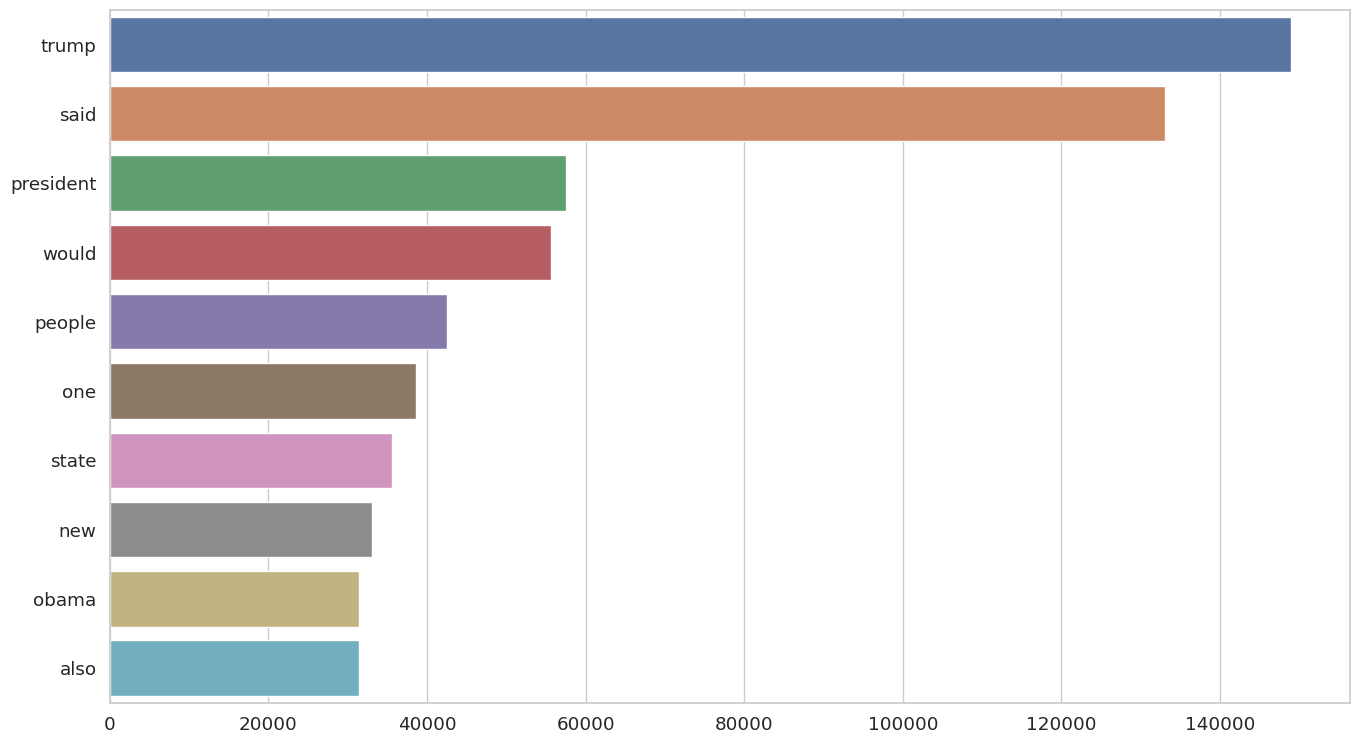

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

**Bigram Analysis**

This code generates a bar plot using Seaborn library to visualize the top 10 most common bigrams (pairs of adjacent words) in the given dataframe "df". The "get_top_text_ngrams()" function uses the CountVectorizer class from Scikit-learn library to extract the n-grams (in this case, bigrams) from the text data. The resulting dictionary of bigrams and their frequency counts is then plotted using Seaborn's barplot() function, with the keys and values of the dictionary being used as the y and x axis, respectively. The plot is displayed in a figure with size 16x9.





<Axes: >

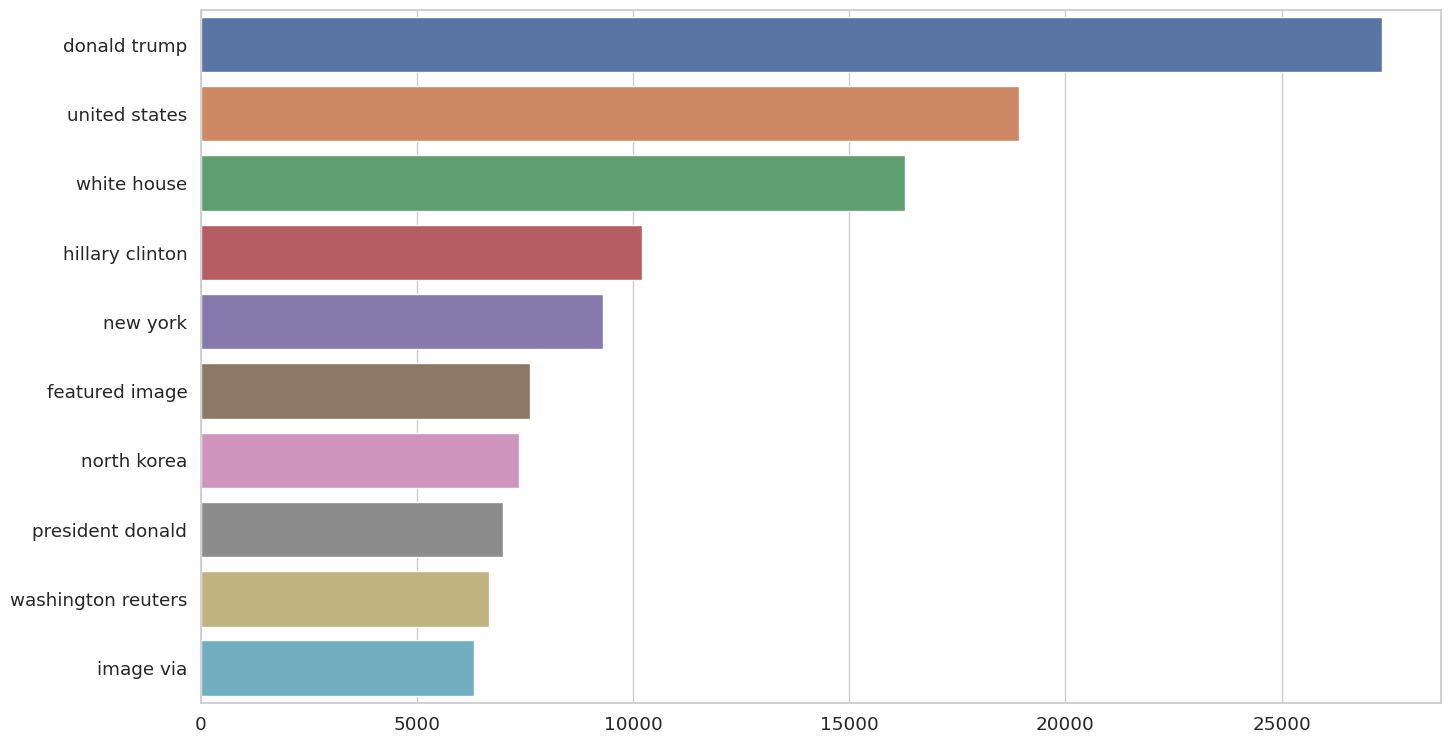

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

**Splitting the data into 2 parts - training and testing data**

This code is splitting the text and category columns of the df dataframe into training and testing sets using the train_test_split() function from the sklearn.model_selection module. The training and testing sets are stored in x_train, x_test, y_train, and y_test variables. The random state is set to 0 for reproducibility purposes.





In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category,random_state = 0)

This code sets the maximum number of features and the maximum length for the text data, presumably for use in a machine learning model.





In [ ]:
max_features = 10000
maxlen = 300

**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**

**Tokenized applies basic processing like changing it to lower case, explicitely setting that as False**

**Lets keep all news to 300, add padding to news with less than 300 words and truncating long ones**

In [ ]:
from keras.utils import pad_sequences

This code initializes a Tokenizer object from the tensorflow.keras.preprocessing.text module with num_words parameter set to max_features. The fit_on_texts method of the Tokenizer is then called with the training data as input, which fits the tokenizer on the training data and creates a vocabulary index based on word frequency. After that, the texts_to_sequences method is used to convert the text in the training set to sequences of integers. These sequences are then padded to a fixed length of maxlen using the pad_sequences function. The resulting x_train contains the preprocessed and padded training data.





In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(tokenized_train, maxlen=maxlen)

This code tokenizes the test data using the previously fitted tokenizer and then applies padding to the tokenized sequences of text to ensure that all sequences are of the same length.





In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

# Introduction to GloVe
**GloVe method is built on an important idea,
You can derive semantic relationships between words from the co-occurrence matrix.
Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.**

**The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.
How do we get a metric that measures semantic similarity between words from this? For that, you will need three words at a time. Let me concretely lay down this statement.**

The behavior of P_ik/P_jk for various words
Consider the entity
P_ik/P_jk where P_ik = X_ik/X_i
Here P_ik denotes the probability of seeing word i and k together, which is computed by dividing the number of times i and k appeared together (X_ik) by the total number of times word i appeared in the corpus (X_i).
You can see that given two words, i.e. ice and steam, if the third word k (also called the “probe word”),
is very similar to ice but irrelevant to steam (e.g. k=solid), P_ik/P_jk will be very high (>1),
is very similar to steam but irrelevant to ice (e.g. k=gas), P_ik/P_jk will be very small (<1),
is related or unrelated to either words, then P_ik/P_jk will be close to 1
So, if we can find a way to incorporate P_ik/P_jk to computing word vectors we will be achieving the goal of using global statistics when learning word vectors.**

**Source Credits - https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010**

In [ ]:
!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip

--2023-04-15 02:21:39--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2023-04-15 02:21:40--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  4.99MB/s    in 4m 44s  

2023-04-15 02:26:25 (5.10 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



In [ ]:
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [ ]:
EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'

This code reads an embedding file and creates a dictionary where the keys are words and the values are their corresponding word embeddings represented as a numpy array. The get_coefs function extracts the word and its vector from each line in the embedding file. The open function reads the embedding file, and a dictionary comprehension is used to create the embeddings index.





In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

This code defines an embedding matrix for the text data by loading pre-trained word embeddings from a file (embeddings_index). It computes the mean and standard deviation of the embeddings, and creates a matrix of random values with the same shape as the embedding matrix (embedding_matrix). For each word in the vocabulary of the training data, it checks if there is a corresponding pre-trained embedding in the embeddings_index, and if so, it adds that embedding to the embedding_matrix at the corresponding index. If there is no pre-trained embedding, the entry for that word in the embedding_matrix remains as a random value. The resulting embedding_matrix will be used as input to the neural network.





In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


**Some Model Parameters**

This code defines hyperparameters for a neural network model. Specifically, it sets the batch size and the number of epochs to train the model for, and also specifies the embedding size, which determines the dimensionality of the word vectors in the model.





In [ ]:
batch_size = 256
epochs = 5
embed_size = 100

This code defines a learning rate reduction callback function ReduceLROnPlateau from keras.callbacks module that monitors the validation accuracy during training and reduces the learning rate by a factor of 0.5 if the validation accuracy does not improve after 2 epochs. The minimum learning rate allowed is set to 0.00001.





In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# TRAINING THE MODEL

This code defines a neural network model for binary classification. The model has an embedding layer with pre-trained weights, followed by two LSTM layers with dropout regularization, and two fully connected layers. The model uses the binary cross-entropy loss function and the Adam optimizer with a learning rate of 0.01.





In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


print summary of model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


This code trains a neural network model using the fit method of Keras with input data x_train and target data y_train, validation data X_test and y_test, and with specified batch size, number of epochs and learning rate reduction. The model architecture includes an embedding layer, two LSTM layers, and two dense layers with binary cross-entropy loss function and accuracy as the evaluation metric. The training history is stored in the 'history' object.





In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/5
132/132 [==============================] - 563s 4s/step - loss: 0.1512 - accuracy: 0.9343 - val_loss: 0.0633 - val_accuracy: 0.9795 - lr: 0.0100
Epoch 2/5
132/132 [==============================] - 564s 4s/step - loss: 0.0383 - accuracy: 0.9869 - val_loss: 0.0179 - val_accuracy: 0.9939 - lr: 0.0100
Epoch 3/5
132/132 [==============================] - 571s 4s/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0087 - val_accuracy: 0.9973 - lr: 0.0100
Epoch 4/5
132/132 [==============================] - 560s 4s/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0065 - val_accuracy: 0.9984 - lr: 0.0100
Epoch 5/5
132/132 [==============================] - 560s 4s/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0068 - val_accuracy: 0.9977 - lr: 0.0100


# ANALYSIS AFTER TRAINING OF MODEL

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 146s 139ms/step - loss: 0.0026 - accuracy: 0.9989
Accuracy of the model on Training Data is -  99.89011883735657 %
351/351 [==============================] - 49s 139ms/step - loss: 0.0068 - accuracy: 0.9977
Accuracy of the model on Testing Data is -  99.76837635040283 %


This code creates a figure with two subplots to display the training and testing accuracy and loss over the number of epochs. It first defines a list of epochs from 0 to 4. It then extracts the accuracy and loss values from the training and testing sets stored in the history object. It then plots the training and testing accuracy and loss on separate subplots with the number of epochs on the x-axis and accuracy or loss on the y-axis. Finally, it shows the plot.





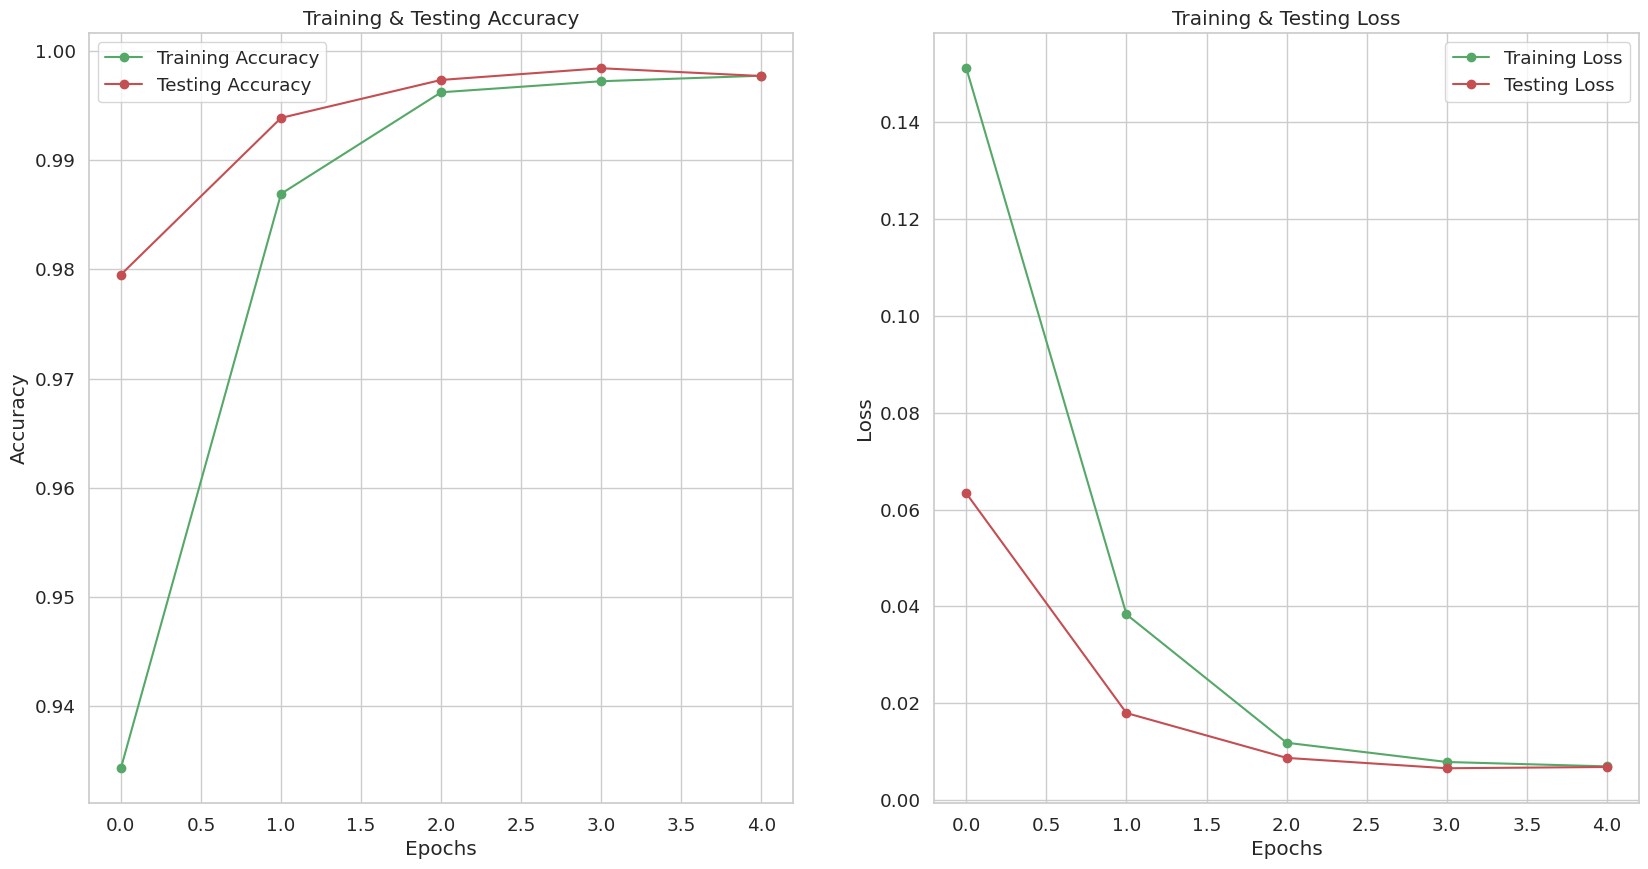

In [ ]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

This code predicts the binary classification labels of the test set using the trained neural network model. The first line is commented out and the second line is used to get the predicted labels. The predicted labels are obtained by thresholding the output probabilities at 0.5 using numpy's astype() function to convert the resulting boolean values to integers. The first 5 predicted labels are then printed using NumPy's slicing notation [:5].





In [ ]:
# pred = model.predict_classes(X_test)
pred = (model.predict(X_test) > 0.5).astype("int32")
pred[:5]

351/351 [==============================] - 49s 139ms/step


array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

This code prints out a classification report that evaluates the performance of the model predictions on the test data. It uses the classification_report function from the sklearn.metrics library, and provides it with the true labels of the test data and the predicted labels from the model. The report includes precision, recall, F1-score and support for each class (fake and not fake).





In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5858
    Not Fake       1.00      1.00      1.00      5367

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



This code computes the confusion matrix (cm) for a binary classification problem, where y_test represents the true labels and pred represents the predicted labels. The confusion matrix is a matrix where each element (i,j) represents the number of observations that belong to class i but were predicted as class j. The confusion matrix is often used to evaluate the performance of a classification model.





In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[5839,   19],
       [   7, 5360]])

This code creates a Pandas DataFrame object cm from the confusion matrix cm. The confusion matrix represents the predicted and actual labels of a binary classification problem. In this case, the DataFrame has two rows and two columns, representing the actual labels 'Fake' and 'Original' and the predicted labels 'Fake' and 'Original'.





In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

This code creates a heatmap visualization of a confusion matrix. The matrix is passed as a pandas DataFrame and plotted using Seaborn's heatmap function. The figure size is set, the color map is chosen, and annotations are added to the cells of the matrix. The x and y tick labels are set to 'Fake' and 'Original', and the x and y labels of the plot are also added.





Text(88.25, 0.5, 'Actual')

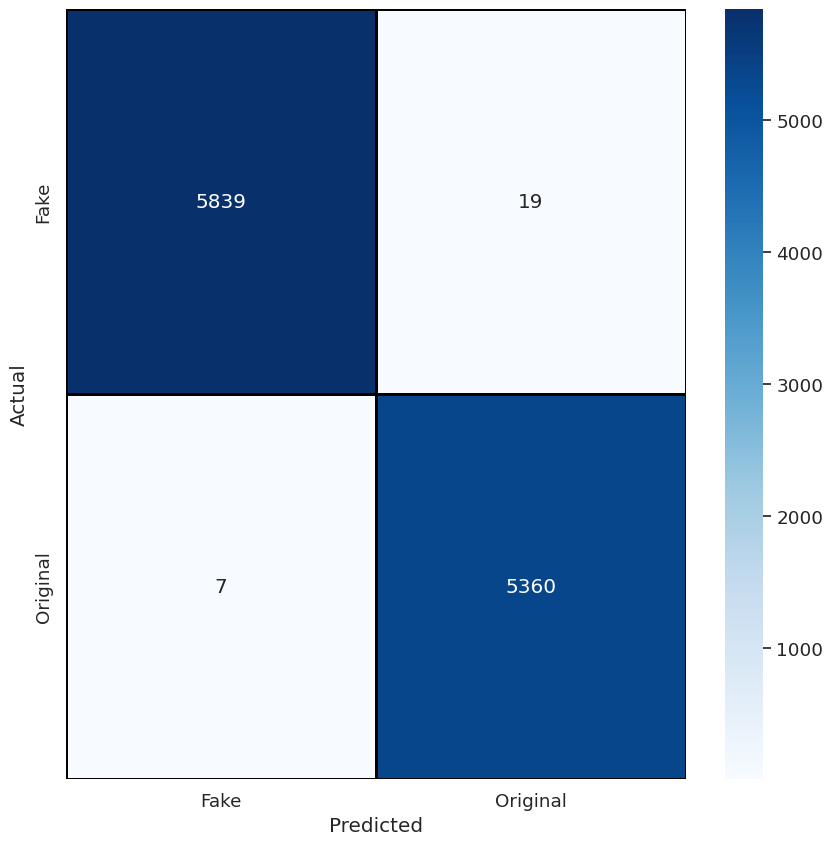

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")